In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataSets/train.csv')
df.head(10)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
5,2692,Women Pink Flats Sandal,4.1,Women,Flipkart,359,499,28.06%,274.0,25.0,153.0,49.0,34.0,15,23,0
6,3236,Women Navy Heels Sandal,4.0,Women,Flipkart,499,999,50.05%,249.0,31.0,130.0,52.0,27.0,9,28,1
7,14633,Women Blue Wedges Sandal,3.9,Women,Flipkart,209,1299,83.91%,121.0,17.0,63.0,25.0,14.0,9,12,0
8,1872,Sneakers For Women (Pink),4.2,Women,Flipkart,549,999,45.05%,191.0,30.0,120.0,25.0,31.0,7,12,1
9,1668,"Men Black, Beige Sandal",4.1,Men,Flipkart,809,899,10.01%,36126.0,5028.0,18688.0,9899.0,3709.0,1272,2558,0


In [3]:
df.tail()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1
15729,13682,Slip On For Men (Brown),5.0,Men,Flipkart,1539,2799,45.02%,8.0,1.0,8.0,0.0,0.0,0,0,1


In [4]:
pd.crosstab(df['platform'],df['fulfilled1'],margins=True)

fulfilled1,0,1,All
platform,,,
Amazon,193,148,341
Flipkart,6075,9314,15389
All,6268,9462,15730


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [6]:
df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

## Data Cleaning

In [7]:
dropna_data = df.dropna()
dropna_data.shape

(14945, 16)

In [8]:
df['price1'] = df['price1'].astype(int)
df['actprice1'] = df['actprice1'].astype(int)
df['Rating'] = df['Rating'].astype(float)

df['platform'] = df['platform'].astype('category')
df['maincateg'] = df['maincateg'].astype('category')

In [9]:
# instead of using bfill and ffill, we fillna with columns mean/median value also
df['norating1'] = df['norating1'].fillna(df['norating1'].median())
df['noreviews1'] = df['noreviews1'].fillna(df['noreviews1'].median())
df['star_5f'] = df['star_5f'].fillna(df['star_5f'].median())
df['star_4f'] = df['star_4f'].fillna(df['star_4f'].median())
df['star_3f'] = df['star_3f'].fillna(df['star_3f'].median())

In [10]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [13]:
df = df.dropna(subset=['maincateg'])

In [14]:
df.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [15]:
df.shape

(15204, 16)

## Data Manipulation

In [16]:
# renaming some columns properly
df.rename(columns={"maincateg": "Gender",
                   "Offer %":"DiscountRate",
                   "noreviews1":"Reviews"}, inplace=True)

df.head(3)

,id,title,Rating,Gender,platform,price1,actprice1,DiscountRate,norating1,Reviews,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1


## Data Aggregation And Grouping

In [17]:
# Total revenue by platform
df.groupby('platform')['price1'].sum()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\1402307919.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('platform')['price1'].sum()


platform
Amazon        226430
Flipkart    10229415
Name: price1, dtype: int64

In [18]:
#Rating by gender
df.groupby('Gender')['norating1'].median()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\2277147433.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['norating1'].median()


Gender
Men      519.0
Women    217.0
Name: norating1, dtype: float64

In [19]:
#Rating by gender
df.groupby('Gender')['price1'].mean()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\453401724.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['price1'].mean()


Gender
Men      738.710416
Women    650.393805
Name: price1, dtype: float64

In [20]:
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [22]:
df['discount'] = (((df['actprice1'] - df['price1']) / df['actprice1']) * 100).round(2)

In [23]:
df['rating_category'] = pd.cut(df['Rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])

In [28]:
df.head()

,id,title,Rating,Gender,platform,price1,actprice1,norating1,Reviews,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,discount,rating_category
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0,30.13,Medium
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,50.03,Medium
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,45.01,High
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,28.45,High
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,40.02,Medium


## Data Visualization

In [29]:
group1 = df.groupby(['platform','Gender'])['price1'].mean()
group1

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\1048835168.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group1 = df.groupby(['platform','Gender'])['price1'].mean()


platform  Gender
Amazon    Men       757.532544
          Women     622.829114
Flipkart  Men       738.201791
          Women     650.898875
Name: price1, dtype: float64

In [30]:
group2 = df.groupby(['platform','Gender'])['Rating'].mean().round(2)
group2

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\1993367240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group2 = df.groupby(['platform','Gender'])['Rating'].mean().round(2)


platform  Gender
Amazon    Men       3.74
          Women     3.93
Flipkart  Men       3.97
          Women     4.05
Name: Rating, dtype: float64

<Axes: xlabel='platform,Gender'>

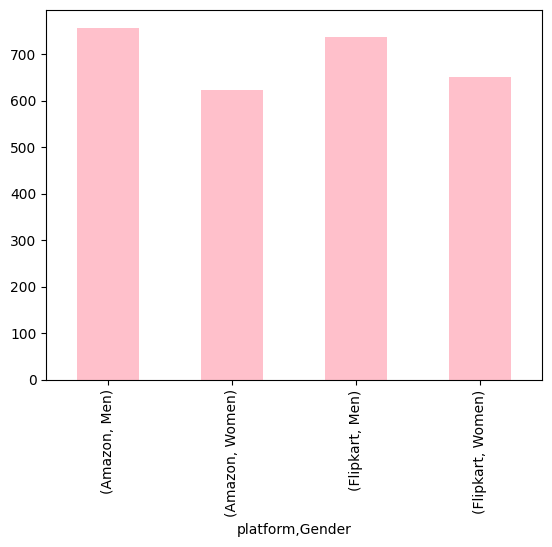

In [31]:
group1.plot(kind="bar", color = "pink")

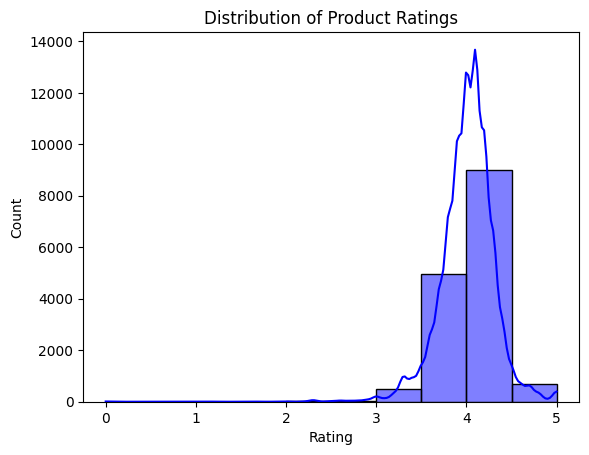

In [32]:
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\572178497.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


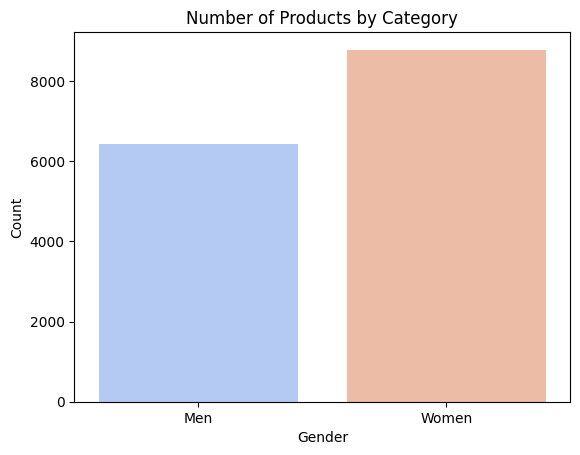

In [33]:
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Number of Products by Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\11561547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='platform', y='discount', palette='viridis')


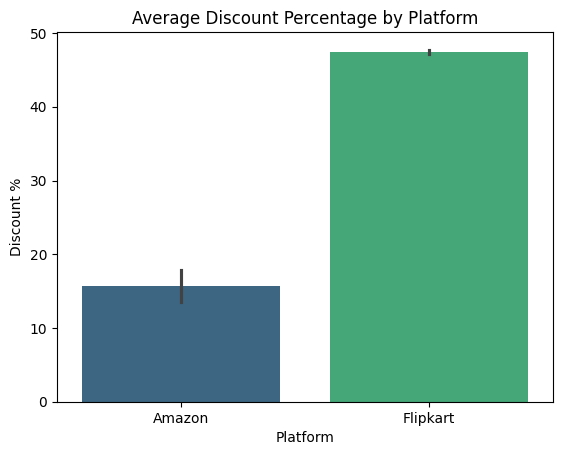

In [34]:
sns.barplot(data=df, x='platform', y='discount', palette='viridis')
plt.title('Average Discount Percentage by Platform')
plt.xlabel('Platform')
plt.ylabel('Discount %')
plt.show()

C:\Users\gpiska\AppData\Local\Temp\ipykernel_24288\1530901150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, y='title', x='Reviews', palette='magma')


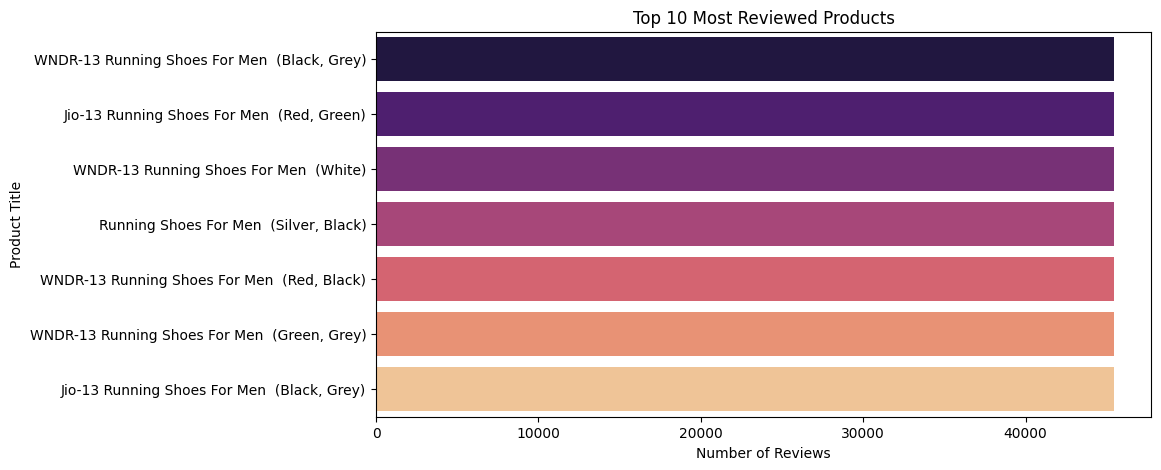

In [35]:
top_reviews = df.nlargest(10, 'Reviews')

plt.figure(figsize=(10, 5))
sns.barplot(data=top_reviews, y='title', x='Reviews', palette='magma')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Title')
plt.show()

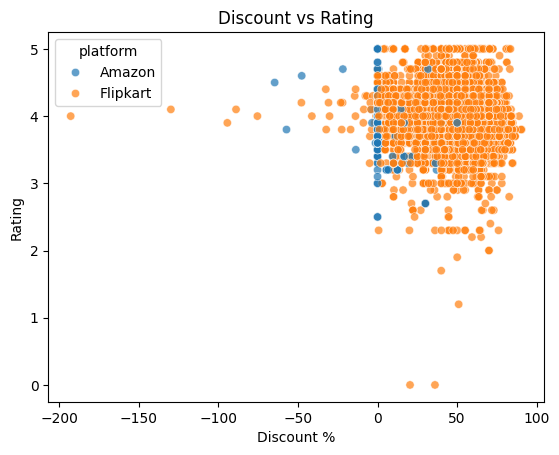

In [36]:
sns.scatterplot(data=df, x='discount', y='Rating', hue='platform', alpha=0.7)
plt.title('Discount vs Rating')
plt.xlabel('Discount %')
plt.ylabel('Rating')
plt.show()